In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
#get data
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [3]:
#replace missing values
fill = ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 
        'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE',
       'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G']
states = education_df['STATE'].unique()

for state in states:
    education_df.loc[education_df['STATE'] == state, fill] = education_df.loc[education_df['STATE'] == state, fill].interpolate()
#drop na after interpolation
education_df2 = education_df.dropna()

In [4]:
#get descriptive statistics
education_df2.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,...,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,...,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,...,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,...,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,...,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.00000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


In [5]:
education_df2.describe(include=['O'])

,PRIMARY_KEY,STATE
count,466,466
unique,465,51
top,2009_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA
freq,2,11


**Observations**
It is interesting that 2009 District of Columbia has a frequency of 2; this seems to indicate a duplicate.
The minumum value for state revenue is 0.
Both math and reading scores are higher for Grade 8 than for Grade 4.
The mean federal revenue is almost double the median federal revenue.

In [6]:
#limit observations to MA
education_df_ma = education_df2[education_df2['STATE'] == 'MASSACHUSETTS']

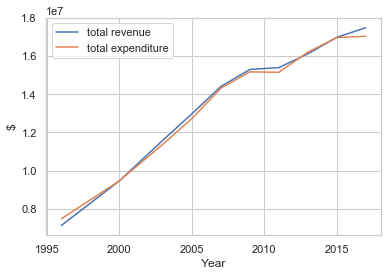

In [7]:
#plot total revenue and total expenditure
plt.plot(education_df_ma['YEAR'], education_df_ma['TOTAL_REVENUE'], label = 'total revenue')
plt.plot(education_df_ma['YEAR'], education_df_ma['TOTAL_EXPENDITURE'], label = 'total expenditure')
plt.legend()
plt.xlabel('Year')
plt.ylabel('$')
plt.show()

For all of the years in the dataset, total revenue and total expenditure are very closely related. For most of the years in the dataset, total revenue and total expenditure are both increasing, although both level off between 2009 and 2011 and total expenditure levels off after 2015.

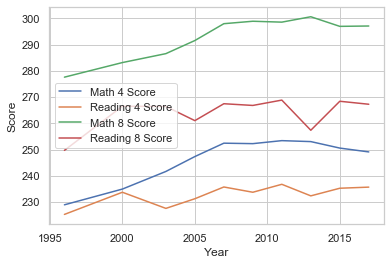

In [8]:
#plot test scores
plt.plot(education_df_ma['YEAR'], education_df_ma['AVG_MATH_4_SCORE'], label = 'Math 4 Score')
plt.plot(education_df_ma['YEAR'], education_df_ma['AVG_READING_4_SCORE'], label = 'Reading 4 Score')
plt.plot(education_df_ma['YEAR'], education_df_ma['AVG_MATH_8_SCORE'], label = 'Math 8 Score')
plt.plot(education_df_ma['YEAR'], education_df_ma['AVG_READING_8_SCORE'], label = 'Reading 8 Score')
plt.legend(loc = '+upper right')
plt.xlabel('Year')
plt.ylabel('Score')
plt.show()

For both grade 4 and grade 8, the math scores are consistently higher than the reading scores.

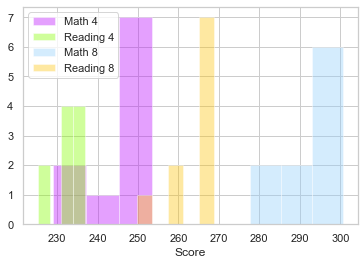

In [9]:
#plot distribution of test scores
sns.distplot(education_df_ma['AVG_MATH_4_SCORE'], kde = False, label = 'Math 4', color = '#bc13fe')
sns.distplot(education_df_ma['AVG_READING_4_SCORE'], kde = False, label = 'Reading 4', color = '#89fe05')
sns.distplot(education_df_ma['AVG_MATH_8_SCORE'], kde = False, label = 'Math 8', color = '#95d0fc')
sns.distplot(education_df_ma['AVG_READING_8_SCORE'], kde = False, label = 'Reading 8', color = '#fec615')
plt.xlabel('Score')
plt.legend(loc='upper left')
plt.show()

The distributions for all of the scores are shifted to the right. Most of the scores are concentrated on the higher end of the range of scores.

In [10]:
#replace missing values for test scores
education_df_ma2 = education_df[education_df['STATE'] == 'MASSACHUSETTS']
education_df_ma3 = education_df_ma2.copy()
education_df_ma4 = education_df_ma2.copy()
fill_list = ['AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE']
for col in fill_list:
    education_df_ma2.loc[:, col].fillna(education_df_ma2.loc[:, col].mean(), inplace=True)
education_df_ma2 = education_df_ma2.dropna()
for col in fill_list:
    education_df_ma3.loc[:, col].fillna(education_df_ma3.loc[:, col].median(), inplace=True)
education_df_ma3 = education_df_ma3.dropna()
for col in fill_list:
    education_df_ma4.loc[:, col].interpolate(inplace = True)
education_df_ma4 = education_df_ma4.dropna()

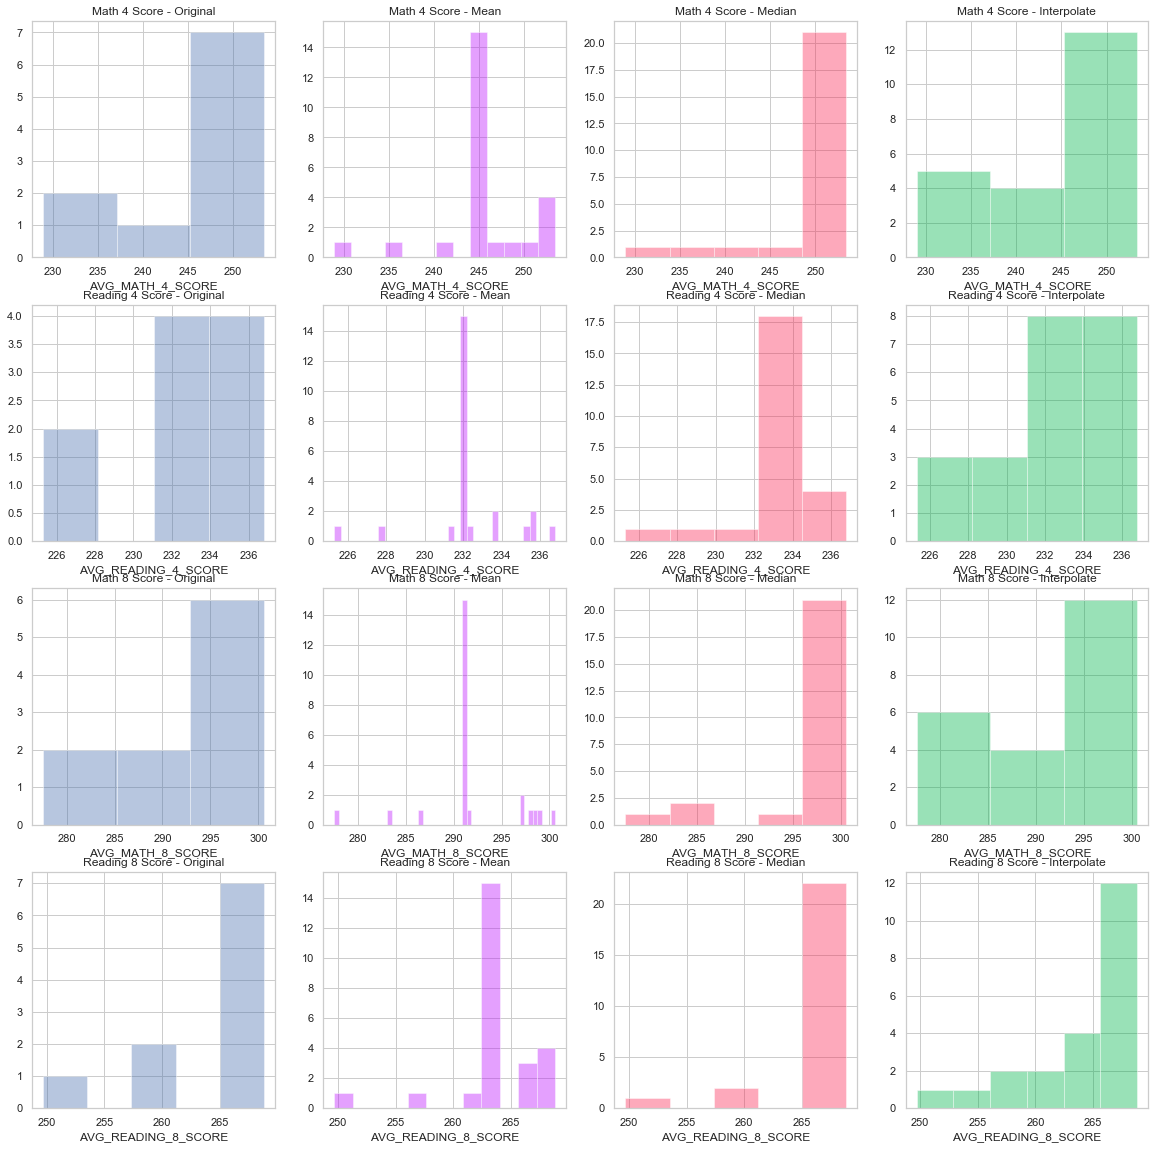

In [11]:
#plot distributions with missing values replaced
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
sns.distplot(education_df_ma['AVG_MATH_4_SCORE'], kde = False)
plt.title('Math 4 Score - Original')
plt.subplot(4,4,2)
sns.distplot(education_df_ma2['AVG_MATH_4_SCORE'], kde = False, color = '#bc13fe')
plt.title('Math 4 Score - Mean')
plt.subplot(4,4,3)
sns.distplot(education_df_ma3['AVG_MATH_4_SCORE'], kde = False, color = '#fa2a55')
plt.title('Math 4 Score - Median')
plt.subplot(4,4,4)
sns.distplot(education_df_ma4['AVG_MATH_4_SCORE'], kde = False, color = '#01b44c')
plt.title('Math 4 Score - Interpolate')
plt.subplot(4,4,5)
sns.distplot(education_df_ma['AVG_READING_4_SCORE'], kde = False)
plt.title('Reading 4 Score - Original')
plt.subplot(4,4,6)
sns.distplot(education_df_ma2['AVG_READING_4_SCORE'], kde = False, color = '#bc13fe')
plt.title('Reading 4 Score - Mean')
plt.subplot(4,4,7)
sns.distplot(education_df_ma3['AVG_READING_4_SCORE'], kde = False, color = '#fa2a55')
plt.title('Reading 4 Score - Median')
plt.subplot(4,4,8)
sns.distplot(education_df_ma4['AVG_READING_4_SCORE'], kde = False, color = '#01b44c')
plt.title('Reading 4 Score - Interpolate')
plt.subplot(4,4,9)
sns.distplot(education_df_ma['AVG_MATH_8_SCORE'], kde = False)
plt.title('Math 8 Score - Original')
plt.subplot(4,4,10)
sns.distplot(education_df_ma2['AVG_MATH_8_SCORE'], kde = False, color = '#bc13fe')
plt.title('Math 8 Score - Mean')
plt.subplot(4,4,11)
sns.distplot(education_df_ma3['AVG_MATH_8_SCORE'], kde = False, color = '#fa2a55')
plt.title('Math 8 Score - Median')
plt.subplot(4,4,12)
sns.distplot(education_df_ma4['AVG_MATH_8_SCORE'], kde = False, color = '#01b44c')
plt.title('Math 8 Score - Interpolate')
plt.subplot(4,4,13)
sns.distplot(education_df_ma['AVG_READING_8_SCORE'], kde = False)
plt.title('Reading 8 Score - Original')
plt.subplot(4,4,14)
sns.distplot(education_df_ma2['AVG_READING_8_SCORE'], kde = False, color = '#bc13fe')
plt.title('Reading 8 Score - Mean')
plt.subplot(4,4,15)
sns.distplot(education_df_ma3['AVG_READING_8_SCORE'], kde = False, color = '#fa2a55')
plt.title('Reading 8 Score - Median')
plt.subplot(4,4,16)
sns.distplot(education_df_ma4['AVG_READING_8_SCORE'], kde = False, color = '#01b44c')
plt.title('Reading 8 Score - Interpolate')
plt.show()

The distributions were very different depending on which method was used to replace the variables. The distribution of the set where interpolation was used are most similar to the original distribution.